Endpoint of epidemic with starting values s0=0.9999999, i0=1e-07: 
s=0.4, i=0.6


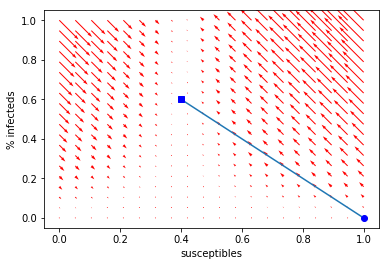

Analytical final state: s=0.4, i=0.6


In [71]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
# Do some analysis of the SIS-infection model

# In this model, we have the following system of two differential equations
# dS/dt = -beta*S*I + nu * I = beta*(N - I)*I - nu * I
# dI/dt =  beta*S*I - nu * I

# We wish to look at the time behaviour and steady states of the system computationally
# Analytically, the system can be solved to give the steady state (assuming beta*N > nu, otherwise I -> 0)
# I_inf = N - nu/beta
# S_inf = nu/beta

# Set parameters
beta = 0.5
nu = 0.2
N = 1.0

# Define the system
def F(Y,t):
    S,I = Y
    dSdt =  -beta*S*I + nu*I
    dIdt =  beta*S*I - nu*I
    return [dSdt,dIdt]

# Define evaluation points
xstart = -0.0
xend = 1.0
ystart = -0.0
yend = 1.0
npoints = 20

y1 = np.linspace(xstart,xend, npoints)
y2 = np.linspace(ystart, yend, npoints)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

# Calculate derivatives
for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = F([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
     
    
# Plot derivatives
Q = plt.quiver(Y1, Y2, u, v, color='r')

i0 = 0.0000001
s0 = 1.0 - i0
tspan = np.linspace(0, 1000, 100)
Y0 = [s0,i0]
ys = odeint(F, Y0, tspan, mxstep = 500)
plt.plot(ys[:,0], ys[:,1], '-') # path
plt.plot([ys[0,0]], [ys[0,1]], 'bo') # start
plt.plot([ys[-1,0]], [ys[-1,1]], 'bs') # end
print("Endpoint of epidemic with starting values s0="+str(y0)+", i0="+str(z0)+": \n" +
      "s="+ str(ys[-1,0])+", i="+ str(ys[-1,1]))
    
plt.xlabel('susceptibles')
plt.ylabel('% infecteds')
plt.show()
print("Analytical final state: s="+str(nu/beta)+", i="+str(N - nu/beta))

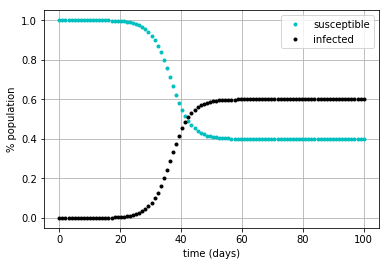

In [64]:
# Show a timeline plot of the infection
import pylab
tspan = np.linspace(0, 100, 100)
i0 = 0.00001
s0 = 1.0 - i0
sol = ys = odeint(F, [s0,i0], tspan, mxstep=50000)
plt.plot(tspan, sol[:, 0], 'c.', label='susceptible')
plt.plot(tspan, sol[:, 1], 'k.', label='infected')
plt.grid()
pylab.legend(loc='upper right')
plt.xlabel('time (days)')
plt.ylabel('% population')
plt.show()